In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install pandas numpy matplotlib seaborn scikit-learn



In [49]:
data= pd.read_csv(r"C:\Users\LENOVO\Desktop\SCHOOL\ML\fpl_players.csv"
                 )


In [50]:
data.head()


,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent,now_cost,element_type
0,Fábio,Ferreira Vieira,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,54,MID
1,Gabriel,Fernando de Jesus,3,2,42,600,5,119.5,154.4,255.0,6,152,52.6,2,0,4,1.4,66,FWD
2,Gabriel,dos Santos Magalhães,3,2,92,1808,19,167.8,481.2,267.0,8,342,91.7,7,0,3,28.1,64,DEF
3,Kai,Havertz,8,2,84,1750,19,242.3,411.8,666.0,11,296,132.1,7,0,4,7.8,78,FWD
4,Karl,Hein,0,0,0,0,0,0.0,0.0,0.0,0,0,0.0,0,0,0,0.0,40,GK


In [51]:
data.shape


(756, 19)

In [52]:
data.shape


(756, 19)

In [53]:
data.describe


<bound method NDFrame.describe of        first_name                second_name  goals_scored  assists  \
0           Fábio            Ferreira Vieira             0        0   
1         Gabriel          Fernando de Jesus             3        2   
2         Gabriel       dos Santos Magalhães             3        2   
3             Kai                    Havertz             8        2   
4            Karl                       Hein             0        0   
..            ...                        ...           ...      ...   
751         Alfie                       Pond             0        0   
752           Tom                     Edozie             0        0   
753           Wes                    Okoduwa             0        0   
754      Emmanuel                    Agbadou             0        0   
755  Vítor Manuel  de Oliveira Lopes Pereira             0        0   

     total_points  minutes  goals_conceded  creativity  influence  threat  \
0               0        0          

In [54]:
data.columns


Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent', 'now_cost', 'element_type'],
      dtype='object')

In [55]:
data.nunique()


first_name             514
second_name            724
goals_scored            16
assists                 12
total_points           111
minutes                417
goals_conceded          48
creativity             415
influence              440
threat                 234
bonus                   25
bps                    278
ict_index              407
clean_sheets            11
red_cards                3
yellow_cards            10
selected_by_percent    109
now_cost                55
element_type             5
dtype: int64

In [57]:
data['now_cost'].unique()


array([ 54,  66,  64,  78,  40,  56,  47,  48,  67,  45,  82,  55,  62,
       102,  50,  43,  68,  61,  41,  58,  60,  15,  52,  49,  51,  44,
        65,  46,  39,  42,  89,   8,  57,  11,  53,  59,  73,  63, 113,
        74,   5,  70,  72,  76,  75, 137,  94,  93, 147,  84,  69,  77,
        95,  71,  98])

In [58]:
#2 cleaning data


In [59]:
data.isnull().sum()

first_name             0
second_name            0
goals_scored           0
assists                0
total_points           0
minutes                0
goals_conceded         0
creativity             0
influence              0
threat                 0
bonus                  0
bps                    0
ict_index              0
clean_sheets           0
red_cards              0
yellow_cards           0
selected_by_percent    0
now_cost               0
element_type           0
dtype: int64

In [61]:
data_cleaned.head()


,id,name,now_cost,position,team,can_select,cost_change_start,starts_per_90,mng_goals_scored,threat_rank_type,...,expected_assists_per_90,cost_change_start_fall,web_name,direct_freekicks_order,points_per_game_rank,total_points,cost_change_event,bps,bonus,ep_next
0,1,Fábio Ferreira Vieira,54,MID,Arsenal,False,-1,0.00,0,322,...,0.00,1,Fábio Vieira,NaN,747,0,0,0,0,0.0
1,2,Gabriel Fernando de Jesus,66,FWD,Arsenal,True,-4,0.90,0,26,...,0.08,4,G.Jesus,NaN,199,42,0,152,6,0.0
2,3,Gabriel dos Santos Magalhães,64,DEF,Arsenal,True,4,1.05,0,3,...,0.05,-4,Gabriel,NaN,37,92,0,342,8,2.6
3,4,Kai Havertz,78,FWD,Arsenal,True,-2,1.03,0,5,...,0.07,2,Havertz,NaN,46,84,0,296,11,2.0
4,5,Karl Hein,40,GKP,Arsenal,False,0,0.00,0,31,...,0.00,0,Hein,NaN,573,0,0,0,0,0.0


In [63]:
data_cleaned.dtypes

id                     int64
name                  object
now_cost               int64
position              object
team                  object
                      ...   
total_points           int64
cost_change_event      int64
bps                    int64
bonus                  int64
ep_next              float64
Length: 88, dtype: object

In [64]:
data_cleaned.describe()


,id,now_cost,cost_change_start,starts_per_90,mng_goals_scored,threat_rank_type,creativity_rank_type,mng_draw,minutes,yellow_cards,...,form,expected_assists_per_90,cost_change_start_fall,direct_freekicks_order,points_per_game_rank,total_points,cost_change_event,bps,bonus,ep_next
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,65.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,378.500000,47.685185,-0.978836,0.582765,0.038360,121.514550,121.514550,0.002646,596.649471,1.333333,...,1.227116,0.066812,0.978836,2.338462,378.500000,24.908730,-0.034392,103.097884,1.916667,1.183862
std,218.382692,12.038408,1.895852,0.548902,0.317038,90.849711,90.849711,0.051400,680.728379,1.854295,...,2.028889,0.217049,1.895852,1.149415,218.382692,31.426329,0.233334,129.958021,4.072155,2.018662
min,1.000000,5.000000,-8.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,-0.200000,0.000000,-12.000000,1.000000,1.000000,0.000000,-1.000000,-11.000000,0.000000,-1.000000
25%,189.750000,43.000000,-2.000000,0.000000,0.000000,43.000000,43.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,189.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,378.500000,45.000000,-1.000000,0.830000,0.000000,100.500000,100.500000,0.000000,262.000000,0.000000,...,0.200000,0.020000,1.000000,2.000000,378.500000,11.000000,0.000000,38.500000,0.000000,0.200000
75%,567.250000,50.000000,0.000000,1.020000,0.000000,195.000000,195.000000,0.000000,1198.500000,2.000000,...,1.800000,0.080000,2.000000,3.000000,567.250000,41.250000,0.000000,175.250000,2.000000,1.700000
max,756.000000,147.000000,12.000000,6.430000,5.000000,328.000000,328.000000,1.000000,2070.000000,9.000000,...,19.000000,5.300000,8.000000,5.000000,756.000000,222.000000,1.000000,742.000000,36.000000,14.500000


In [68]:
#3 visualizing


In [71]:
sns.set(style="whitegrid")

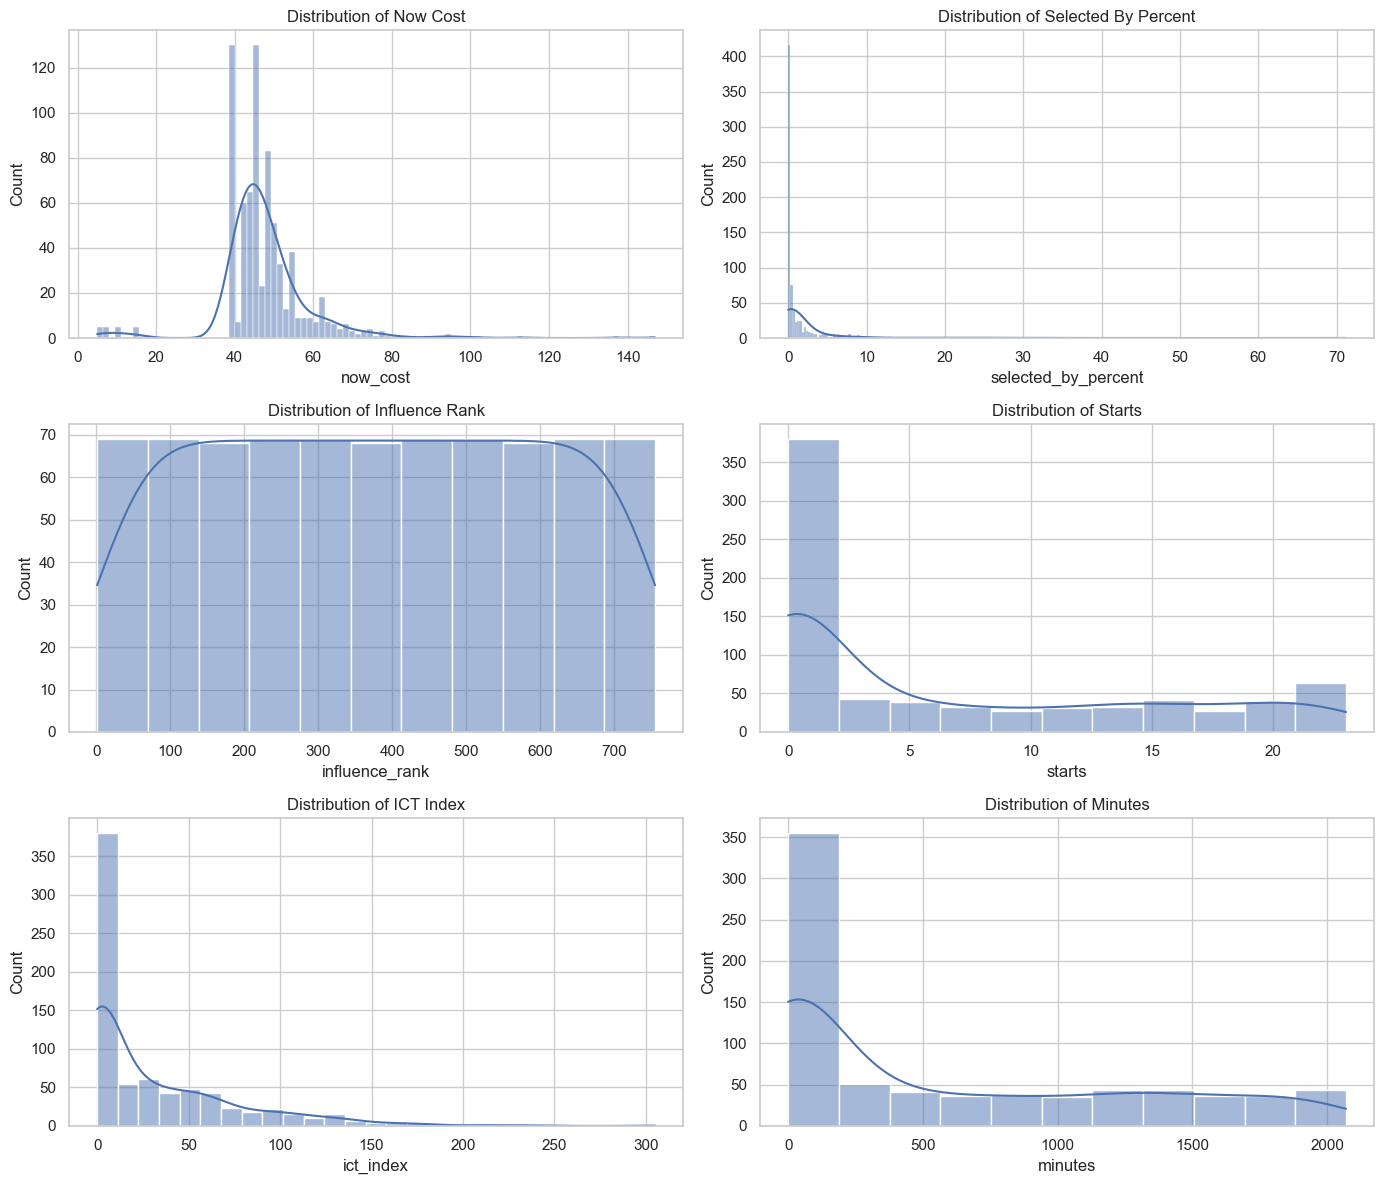

In [72]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
sns.histplot(data_cleaned['now_cost'], kde= True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Now Cost')
# Plotting the distribution of 'selected_by_percent'
sns.histplot(data_cleaned['selected_by_percent'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Selected By Percent')

# Plotting the distribution of 'influence_rank'
sns.histplot(data_cleaned['influence_rank'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Influence Rank')

# Plotting the distribution of 'starts'
sns.histplot(data_cleaned['starts'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Starts')

# Plotting the distribution of 'ict_index'
sns.histplot(data_cleaned['ict_index'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of ICT Index')

# Plotting the distribution of 'minutes'
sns.histplot(data_cleaned['minutes'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Minutes')

# Adjust spacing of the histogram
plt.tight_layout()
plt.show()

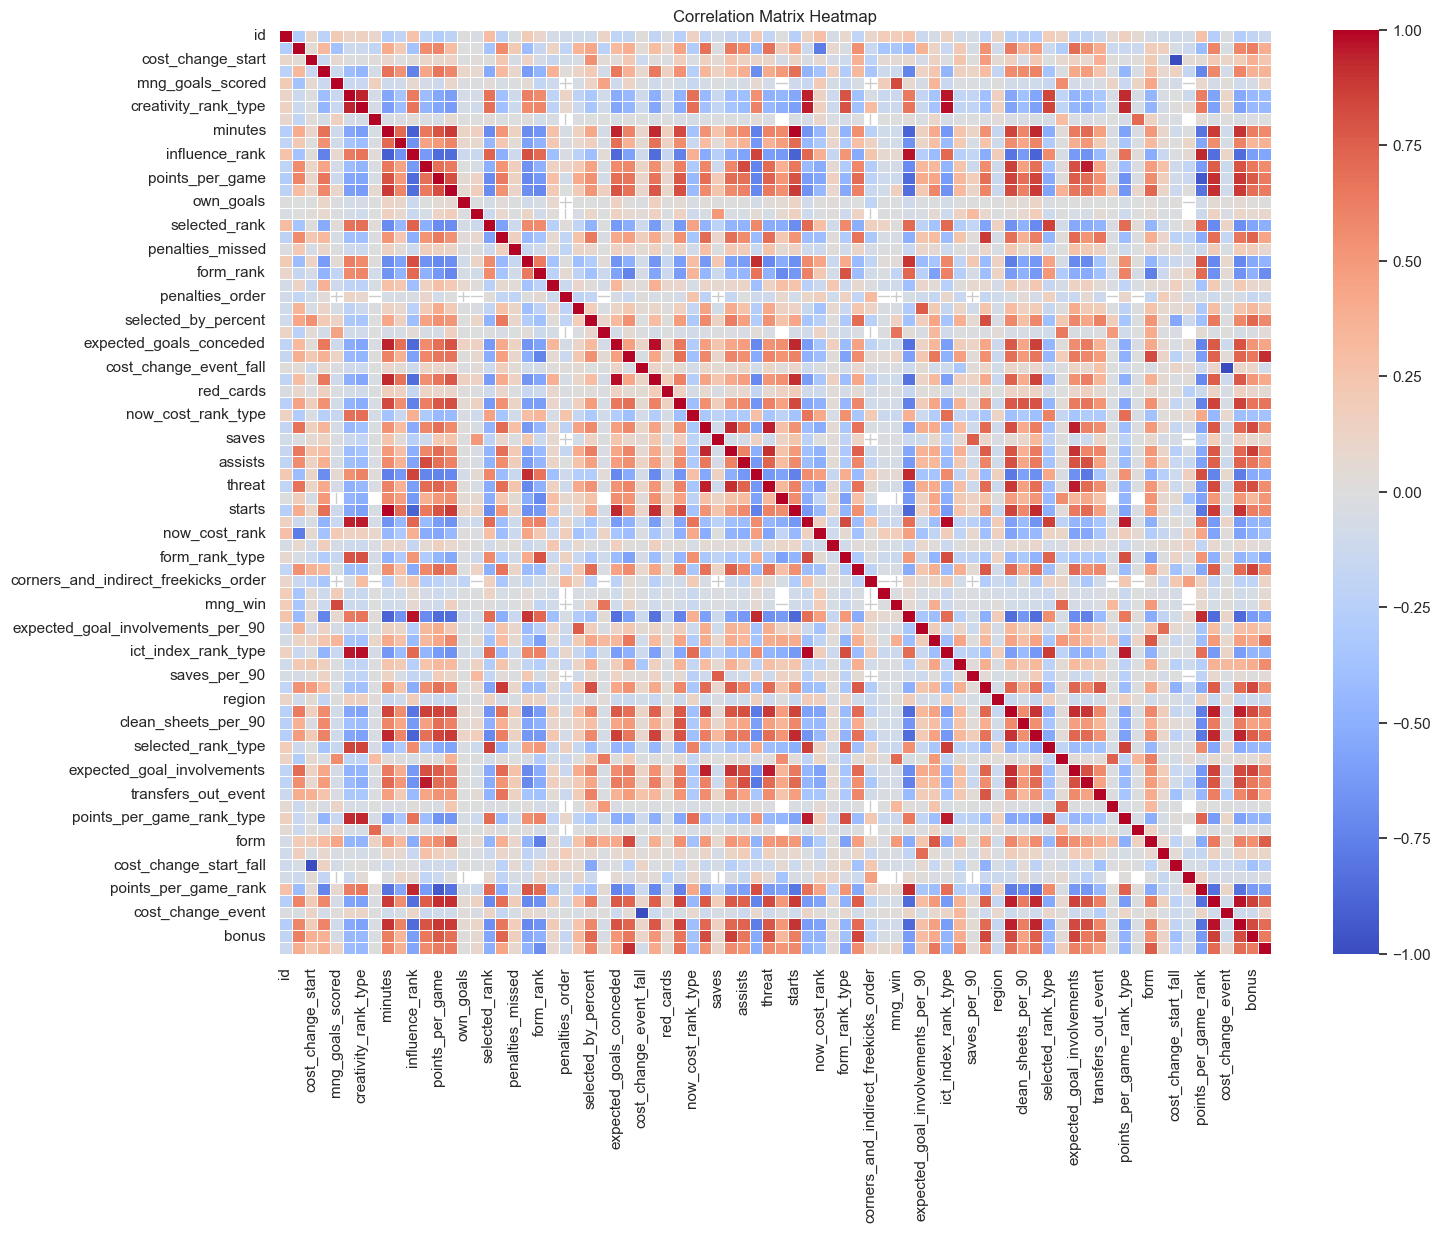

In [79]:
#selecting only numeric values,calculating the correlation matrix and plotting heat map
numeric_values= data_cleaned.select_dtypes(include=[float,int])
correlation_matrix= numeric_values.corr()
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot= False, cmap= 'coolwarm', linewidths= 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
                                           

In [85]:
#analysis based off positions
position_data=data_cleaned.groupby('position')[['now_cost','selected_by_percent','ict_index','minutes','total_points']].describe()
position_data

now_cost                                                        \
            count       mean        std   min    25%   50%   75%    max   
position                                                                  
DEF         250.0  43.820000   5.107243  39.0  40.00  43.0  45.0   73.0   
FWD          81.0  56.987654  15.067758  44.0  48.00  54.0  63.0  147.0   
GKP          77.0  42.675325   4.111734  39.0  40.00  41.0  44.0   55.0   
MID         328.0  51.823171  10.510770  43.0  45.00  49.0  54.0  137.0   
MNG          20.0   9.750000   3.795773   5.0   7.25   9.5  12.0   15.0   

         selected_by_percent            ...  minutes         total_points  \
                       count      mean  ...      75%     max        count   
position                                ...                                 
DEF                    250.0  1.998000  ...  1266.75  2070.0        250.0   
FWD                     81.0  3.698765  ...  1224.00  2034.0         81.0   
GKP                     77.0  2.597403  ...  1070.00  2070.0         77.0   
MID                    328.0  1.519817  ...  1154.00  2065.0        328.0   
MNG                     20.0  5.015000  ...     0.00     0.0         20.0   

                                                             
               mean        std  min  25%   50%   75%    max  
position                                                     
DEF       21.536000  26.020858  0.0  0.0  11.0  35.0  102.0  
FWD       32.518519  41.175269  0.0  0.0   8.0  53.0  150.0  
GKP       19.519481  28.577047  0.0  0.0   1.0  37.0   99.0  
MID       28.042683  33.104016  0.0  0.0  17.5  47.0  222.0  
MNG        5.600000   5.413434  0.0  1.0   6.0   9.0   19.0  

[5 rows x 40 columns]

Text(0.5, 1.0, 'ICT Index Vs. Selected by Percentage')

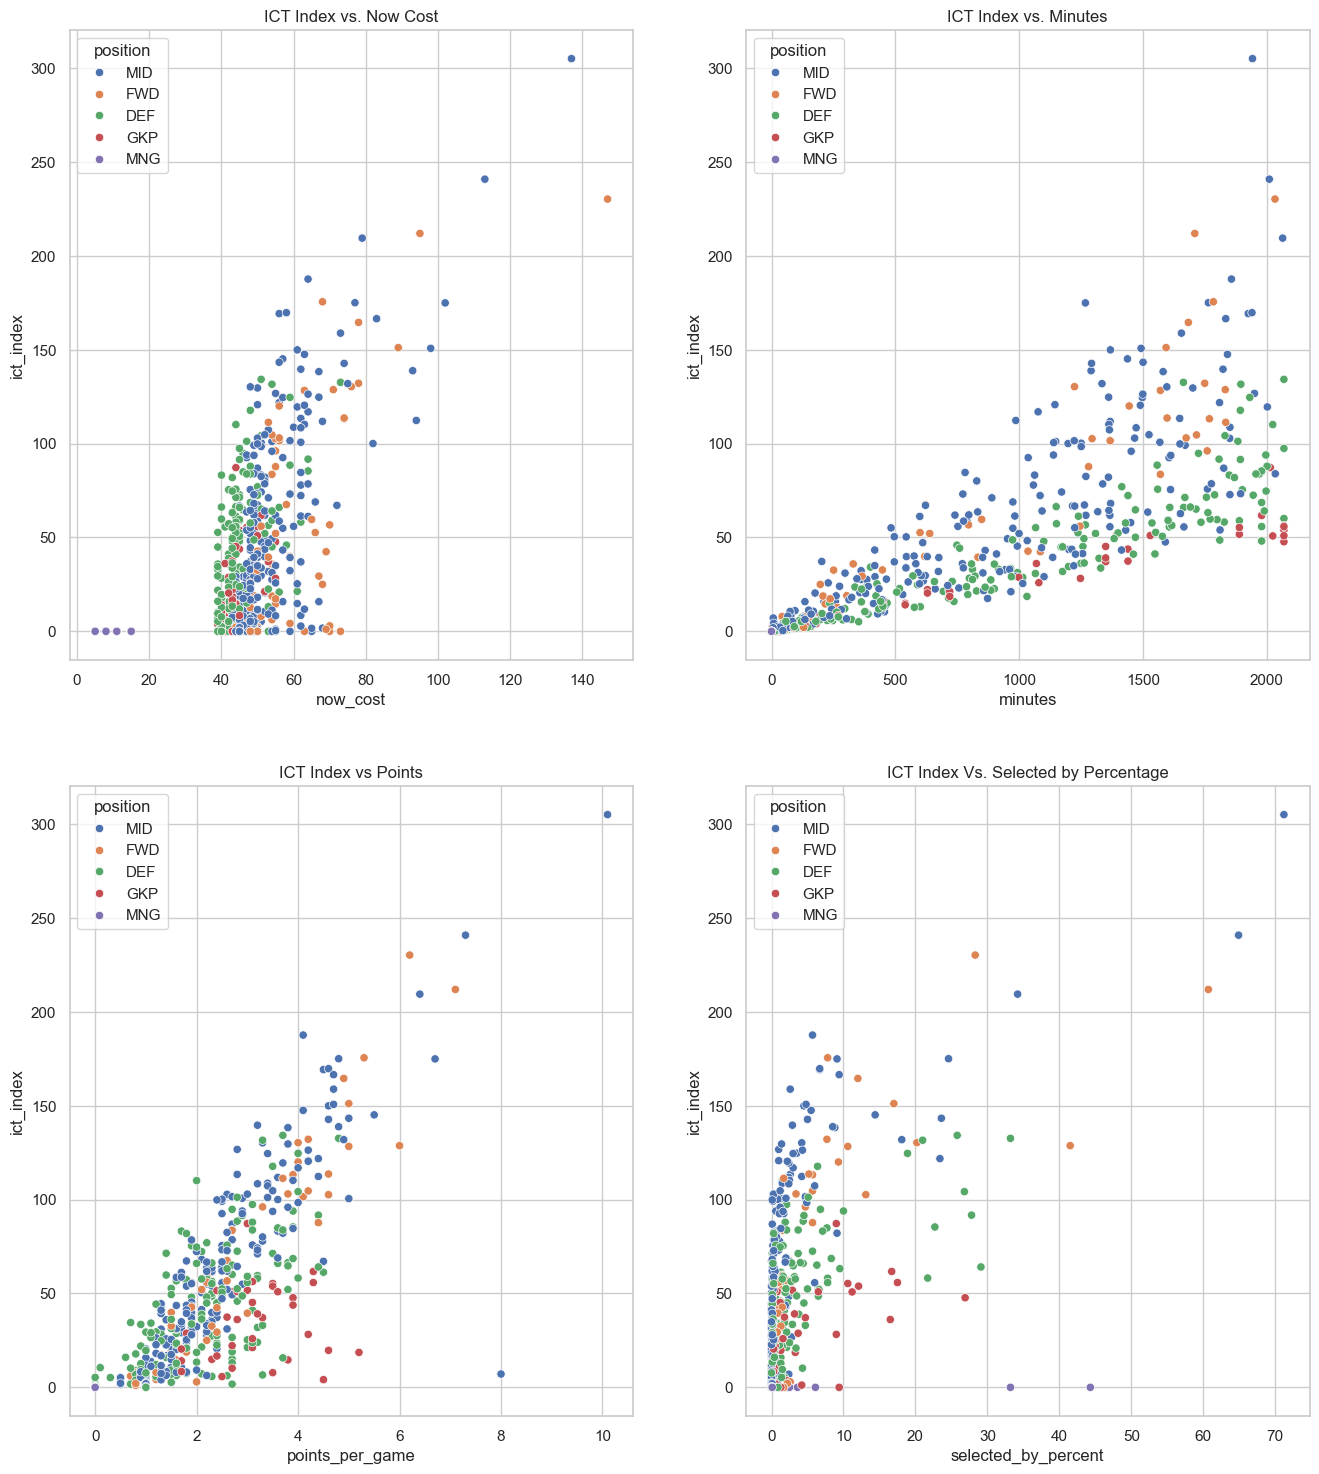

In [96]:
#comparing ict index with various metrics
fig, axes= plt.subplots(nrows=2, ncols=2, figsize=(16,18))
sns.scatterplot(x='now_cost', y='ict_index', hue= 'position',data= data_cleaned, ax=axes[0,0])
axes[0,0].set_title('ICT Index vs. Now Cost')

#with minutes
sns.scatterplot(x='minutes', y='ict_index', hue= 'position', data= data_cleaned, ax= axes[0,1])
axes[0,1].set_title('ICT Index vs. Minutes')

#with points  per game
sns.scatterplot(x='points_per_game', y='ict_index', hue= 'position', data= data_cleaned, ax= axes[1,0])
axes[1,0].set_title('ICT Index vs Points')

#with selected by percentage
sns.scatterplot(x='selected_by_percent', y='ict_index', hue='position', data= data_cleaned, ax= axes[1,1])
axes[1,1].set_title('ICT Index Vs. Selected by Percentage')

In [97]:
#Analyzing top players by ict index and points per game
top_ict_index= data_cleaned.nlargest(10,'ict_index')[['name','position','ict_index','now_cost','points_per_game']]
top_ict_index
# by ict_index

,name,position,ict_index,now_cost,points_per_game
435,Mohamed Salah,MID,305.0,137,10.1
231,Cole Palmer,MID,240.8,113,7.3
464,Erling Haaland,FWD,230.2,147,6.2
535,Alexander Isak,FWD,211.9,95,7.1
130,Bryan Mbeumo,MID,209.4,79,6.4
652,Dejan Kulusevski,MID,187.6,64,4.1
722,Matheus Santos Carneiro Da Cunha,FWD,175.5,68,5.3
532,Anthony Gordon,MID,175.0,77,4.8
13,Bukayo Saka,MID,174.9,102,6.7
324,Alex Iwobi,MID,169.7,58,4.6


In [98]:
top_points_per_game = data_cleaned.nlargest(10, 'points_per_game')[['name', 'position', 'points_per_game', 'ict_index', 'now_cost', 'minutes']]
top_points_per_game

,name,position,points_per_game,ict_index,now_cost,minutes
435,Mohamed Salah,MID,10.1,305.0,137,1943
279,Romain Esse,MID,8.0,7.1,50,7
231,Cole Palmer,MID,7.3,240.8,113,2011
535,Alexander Isak,FWD,7.1,211.9,95,1710
13,Bukayo Saka,MID,6.7,174.9,102,1268
130,Bryan Mbeumo,MID,6.4,209.4,79,2065
464,Erling Haaland,FWD,6.2,230.2,147,2034
584,Chris Wood,FWD,6.0,128.7,71,1833
88,Justin Kluivert,MID,5.5,145.1,57,1438
722,Matheus Santos Carneiro Da Cunha,FWD,5.3,175.5,68,1785


In [100]:
#best performers by position
top_performers_by_position = {
    'DEF': {},
    'MID': {},
    'FWD': {},
    'GKP': {}
}
for position in top_performers_by_position.keys():
    top_performers_by_position[position]['ICT Index'] = data_cleaned[data_cleaned['position'] == position].nlargest(5, 'ict_index')[['name',  'ict_index', 'now_cost', 'minutes', 'points_per_game']]
    top_performers_by_position[position]['Minutes'] = data_cleaned[data_cleaned['position'] == position].nlargest(5, 'minutes')[['name',  'minutes', 'ict_index', 'now_cost', 'points_per_game']]
    top_performers_by_position[position]['Points Per Game '] = data_cleaned[data_cleaned['position'] == position].nlargest(5, 'points_per_game')[['name', 'points_per_game_rank', 'ict_index', 'now_cost', 'minutes']]

top_performers_by_position

{'DEF': {'ICT Index':                        name  ict_index  now_cost  minutes  points_per_game
  332        Antonee Robinson      134.2        51     2070              3.7
  419  Trent Alexander-Arnold      132.6        73     1664              4.8
  655             Pedro Porro      131.6        54     1896              3.3
  463          Joško Gvardiol      124.6        59     1932              4.0
  264            Daniel Muñoz      117.7        48     1894              3.5,
  'Minutes':                  name  minutes  ict_index  now_cost  points_per_game
  100    Illia Zabarnyi     2070       60.1        44              2.7
  119    Nathan Collins     2070       97.4        45              3.1
  332  Antonee Robinson     2070      134.2        51              3.7
  352        Leif Davis     2025      110.1        44              2.0
  263   Tyrick Mitchell     2002       87.9        48              3.1,
  'Points Per Game ':                              name  points_per_game_rank  